In [1]:
import numpy as np
import pandas as pd

In [4]:
columns_names=['user_id','item_id','rating','timestamp']

In [5]:
df=pd.read_csv('u.data',sep='\t',names=columns_names)

In [173]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
movie_titles=pd.read_csv('Movie_Id_Titles')

In [9]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df=pd.merge(df,movie_titles,on='item_id')

In [11]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set_style('white')

## Checking Movies with Highest Ratings

In [22]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

## Checking movies with the most Ratings

In [19]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [24]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [68]:
ratings['Total Ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings

,rating,Total Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


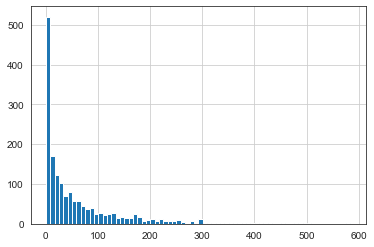

In [29]:
ratings['Total Ratings'].hist(bins=70)

Most of the movies have very less number of ratings.

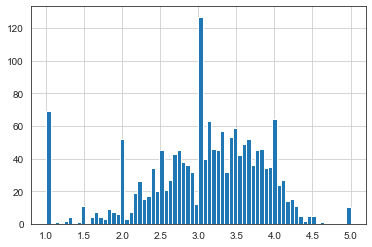

In [30]:
ratings['rating'].hist(bins=70)

Ratings are mostly normally distributed around 3 to 3.5
There's a little peak over the 5 start rating, signifying a small group of people must have watched it and rated it a 5star.


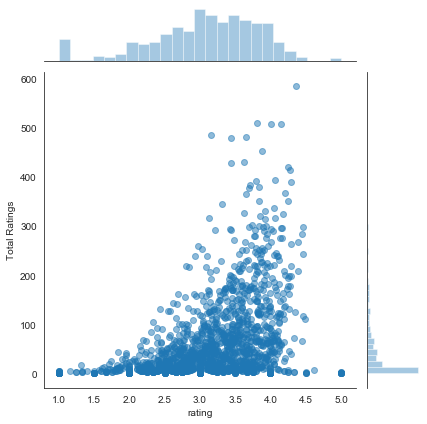

In [33]:
sns.jointplot(x='rating', y='Total Ratings', data=ratings, alpha=0.5)

Higher ratings correspond to a more number of ratings. Signifying if the movie is good, people with rate it high,and higher rated movies are watched by more number of people. 
At 5 start rating there are comparatively less number of ratings on y-axis. Signifying 1 or 2 people must have watched that movie and rated it a full 5 star.

In [34]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [55]:
moviemat=df.pivot_table(index='user_id',values='rating', columns='title')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the values are 'NaN' this makes sense because most people haven't seen most of the movies.

## Sorting movie based on number of ratings

In [59]:
ratings.sort_values(by='Total Ratings',ascending=False).head()

,rating,Total Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Choosing two movies -:

1) Star Wars(1977)  --> Science Fiction

2) Liar Liar ---> Comedy

## Grabbing the user ratings for the Star Wars Movie

In [165]:
starwars_rate= moviemat['Star Wars (1977)']
liarliar_rate=moviemat['Liar Liar (1997)']
starwars_rate

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

Using 'corrwith' to find correlation between two dataframe object. 
Storing the correlation obtained in two different DataFrames for the two Movies

In [166]:
starwars_rate.dropna(inplace=True)
movies_similar_StarWars = pd.DataFrame(moviemat.corrwith(starwars_rate) , columns=['Correlation_SW'] )
movies_similar_StarWars

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation_SW
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


The above information gives the details about the correlation of other movies with Star Wars in terms of ratings.

In [156]:
movies_similar_LiarLiar = pd.DataFrame(moviemat.corrwith(liarliar_rate), columns=['Correlation_LL'])
movies_similar_LiarLiar

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation_LL
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
...,...
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016
Zeus and Roxanne (1997),-0.500000


The above information gives the details about the correlation of other movies with Liar Liar in terms of ratings.

In [167]:
movies_similar_StarWars.sort_values(by='Correlation_SW',ascending=False).head(10)

,Correlation_SW
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


But the above predicted movies do not match with the Star Wars movie, but still got a correlation value=1 signifying highly correlated. The reason for this is because these movies were happen to watch by few people and they rated them high.
Solution : Sorting the correlated movies based on number of ratings.

In [168]:
movies_similar_StarWars= movies_similar_StarWars.join(ratings['Total Ratings'])


In [170]:
movies_similar_StarWars.dropna(inplace=True)
movies_similar_StarWars.head(10)

,Correlation_SW,Total Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [171]:
movies_like_StarWars = movies_similar_StarWars[movies_similar_StarWars['Total Ratings']>100]
movies_like_StarWars.sort_values(by='Correlation_SW',ascending=False).head(10)

,Correlation_SW,Total Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


Thus, the predicted movies which are very much correlated with the movie Star Wars are given above which actually makes sense since most of them fall into the same Science Fiction category.

In [157]:
movies_similar_LiarLiar = movies_similar_LiarLiar.join(ratings['Total Ratings'])

In [159]:
movies_similar_LiarLiar.dropna(inplace=True)
movies_similar_LiarLiar.head(10)

,Correlation_LL,Total Ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
"20,000 Leagues Under the Sea (1954)",-0.027932,72
2001: A Space Odyssey (1968),-0.057864,259
"39 Steps, The (1935)",0.400918,59
8 1/2 (1963),0.178064,38


In [161]:
movies_like_LiarLiar = movies_similar_LiarLiar[movies_similar_LiarLiar['Total Ratings']>100]

In [164]:
movies_like_LiarLiar.sort_values(by='Correlation_LL', ascending=False).head(10)

,Correlation_LL,Total Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
